In [1]:
import pandas as pd
import numpy as np
import pickle as pkl
from sklearn.decomposition import FactorAnalysis
from sklearn.preprocessing import StandardScaler


Panda dataframe: two time periods are included:
- Inform = end target shown to go tone (Preparatory activity): ~ 200 - 500 ms
- move = go tone to end target touched: ~2-

Including 7 frequency bands:
- theta = 4 - 6 hz
- alpha = 6 - 11 hz
- beta = 11 - 30 hz
- gamma = 31 - 59 hz
- high gamma 1 = 61 - 119 hz
- high gamma 2 = 121 - 239 hz
- high gamma 3 = 241 - 479 hz

There were 12 good channels shared between the three dates and a total of 1038 trials. 
Each trial is a row in the dataframe. Each row has 171 columns
column 1 = date (2021-11-15, 2021-11-16, 2021-11-17)
column 2 = stim (0 or 1)
column 3 = angle (90, 180, 270, 360)
columns 4 to 171 = power for a specific time period, in a specific frequency band, for a specific channel (2 periods x 7 bands x 12 channels) = 168 features per trial.

In [2]:
path_to_data = r'/Users/jasminezhou/Documents/Python/ML_Neuro_599/CSE599_data.pkl'
data = pd.read_pickle(path_to_data)
data.iloc[100:110,:]

,date,stim,angle,inform theta A3,inform theta A5,inform theta A6,inform theta A12,inform theta A14,inform theta B3,inform theta B4,...,move hg3 A6,move hg3 A12,move hg3 A14,move hg3 B3,move hg3 B4,move hg3 B5,move hg3 B6,move hg3 B12,move hg3 B13,move hg3 B16
100,2021-11-15,1,180,3021.087251,3198.533563,1695.217063,1744.118056,4688.819968,1615.799707,312.392460,...,0.001421,0.001651,0.001973,0.001044,0.000675,0.001430,0.001078,0.001059,0.000642,0.001490
101,2021-11-15,0,360,69.151253,65.123376,98.402198,20.409693,74.471499,9.700137,9.597495,...,0.000841,0.000450,0.000336,0.000534,0.000439,0.000525,0.000690,0.000636,0.000422,0.000524
102,2021-11-15,0,360,40.804850,32.112762,49.396827,15.941514,30.958361,16.903965,15.202790,...,0.000364,0.000705,0.000756,0.000855,0.000733,0.000711,0.000699,0.000519,0.000546,0.000717
103,2021-11-15,1,270,2571.190674,2908.805760,1351.015825,1519.847740,4383.557652,1362.264575,158.225427,...,0.001164,0.001396,0.001746,0.000850,0.000834,0.000743,0.001336,0.001509,0.000732,0.002080
104,2021-11-15,0,270,63.868625,86.455040,84.937651,57.420826,86.778878,32.351762,30.834447,...,0.000534,0.000572,0.000715,0.000405,0.000433,0.000391,0.000515,0.000598,0.000484,0.000569
105,2021-11-15,0,90,96.656129,69.255925,71.678398,35.715373,122.153097,46.732136,37.477273,...,0.001023,0.000711,0.000715,0.000687,0.000649,0.000699,0.000698,0.000749,0.000659,0.000752
106,2021-11-15,1,180,2794.006624,3039.870927,1534.182995,1432.130225,4521.907472,1172.708615,109.223004,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
107,2021-11-15,0,360,23.811353,14.992079,23.963416,5.874756,19.880093,6.481941,6.588809,...,0.000607,0.000938,0.000506,0.000699,0.000623,0.000597,0.000587,0.000466,0.000564,0.000657
108,2021-11-15,1,270,4914.756972,4877.746502,2356.255472,2545.775736,7511.688091,2165.407781,191.202680,...,0.001807,0.000974,0.005806,0.000380,0.000520,0.001621,0.000662,0.003300,0.000417,0.003548
109,2021-11-15,0,360,101.453497,83.484631,118.024913,60.420618,75.022474,32.814975,20.659799,...,0.000478,0.000664,0.000312,0.000489,0.000347,0.000474,0.000500,0.000535,0.000603,0.000408


In [44]:
# Get data from data frame where stim is 0
# Arange the data by reaching angle (90, 180, 270, 360), that is, have all trials at 90 degrees, then 180, etc.
data_no_stim = data[data['stim'] == 0]
data_no_stim = data_no_stim[data_no_stim['date'] == '2021-11-16']
data_no_stim = data_no_stim.dropna()
data_no_stim = data_no_stim.sort_values(by='angle')

# get data for specific conditions
inform_no_stim = data_no_stim.iloc[:, 3:-7*12]
move_no_stim = data_no_stim.iloc[:, -7*12:]
all_data_no_stim = data_no_stim.iloc[:, 3:]

# get data from data frame where stim is 1
data_stim = data[data['stim'] == 1]
data_stim = data_stim[data_stim['date'] == '2021-11-16']
data_stim = data_stim.dropna()
data_stim = data_stim.sort_values(by='angle')

# get data for specific conditions
inform_stim = data_stim.iloc[:, 3:-7*12]
move_stim = data_stim.iloc[:, -7*12:]
all_data_stim = data_stim.iloc[:, 3:]

# get all data
data_all = data
data_all = data_all.dropna()
data_all = data_all.sort_values(by='angle')

# get data for specific conditions
move_all = data_all.iloc[:, -7*12:]
inform_all = data_all.iloc[:, 3:-7*12]
all_data_all = data_all.iloc[:, 3:]

data_all.tail()



,date,stim,angle,inform theta A3,inform theta A5,inform theta A6,inform theta A12,inform theta A14,inform theta B3,inform theta B4,...,move hg3 A6,move hg3 A12,move hg3 A14,move hg3 B3,move hg3 B4,move hg3 B5,move hg3 B6,move hg3 B12,move hg3 B13,move hg3 B16
422,2021-11-15,1,360,3399.088026,3759.441507,1968.382839,1635.555978,6434.235207,1728.861208,257.045247,...,0.001330,0.001780,0.002091,0.000904,0.000941,0.001165,0.001375,0.001731,0.000697,0.001162
157,2021-11-15,1,360,4376.565837,4739.421020,2437.542538,2213.975695,7074.804670,1789.351025,111.706794,...,0.001292,0.000490,0.006551,0.000509,0.001283,0.001522,0.001075,0.004600,0.000511,0.003514
420,2021-11-15,1,360,2928.213435,3384.883130,1981.065267,1434.225821,5962.755789,1342.813272,221.709913,...,0.003719,0.002300,0.014740,0.001483,0.000841,0.002951,0.001380,0.007228,0.000981,0.009244
808,2021-11-16,0,360,27.462381,18.659602,45.165962,17.666577,17.245029,28.494027,18.985615,...,0.000598,0.000448,0.000383,0.001331,0.000361,0.000482,0.000307,0.001526,0.000936,0.000569
217,2021-11-15,0,360,257.906673,158.894891,231.218314,53.103272,205.271964,36.704090,27.346894,...,0.000628,0.000658,0.000690,0.000480,0.000481,0.000429,0.000601,0.000514,0.000628,0.000538


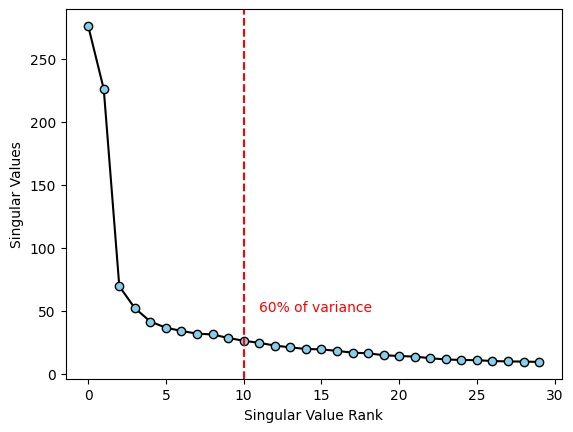

In [49]:
import matplotlib.pyplot as plt
# make a scree plot to determine the number of factors to use in FA
data_select = data_all
data_to_use = all_data_all

# Plot the eigenvalues of the data covariance matrix, sorted in decreasing order. Using SVD to get the eigenvalues.
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_to_use)
U, S, Vt = np.linalg.svd(data_scaled)
# The eigenvalues are the singular values squared divided by the number of samples
eigenvalues = S**2 / (data_scaled.shape[0]) 

# # Plot the eigenvalues
# plt.plot(eigenvalues,c="k", marker="o", mfc="r", mec="k")
# # Determine the elbow point explaining 80% of the variance
# cumulative_variance = np.cumsum(eigenvalues) / np.sum(eigenvalues)

plt.plot(S[:30],c="k", marker="o", mfc="skyblue", mec="k")
# Determine the elbow point explaining 80% of the variance
cumulative_variance = np.cumsum(S) / np.sum(S)

num_factors = np.argmax(cumulative_variance > 0.6)
plt.axvline(num_factors, c="red", linestyle="--")
# add text to label the dashed line
plt.text(num_factors+1, 50, "60% of variance", color="red")
plt.xlabel("Singular Value Rank")
plt.ylabel("Singular Values")
# remove grid
plt.grid(False)



In [50]:
def set_grid_invisible(ax):
    ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.xaxis._axinfo["grid"]['color'] =  (1,1,1,0)
    ax.yaxis._axinfo["grid"]['color'] =  (1,1,1,0)
    ax.zaxis._axinfo["grid"]['color'] =  (1,1,1,0)

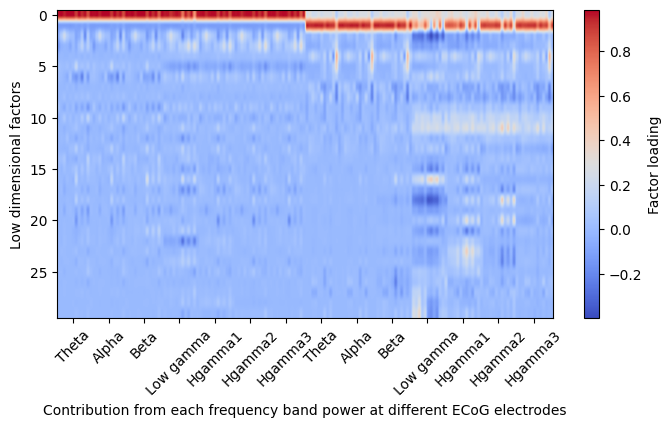

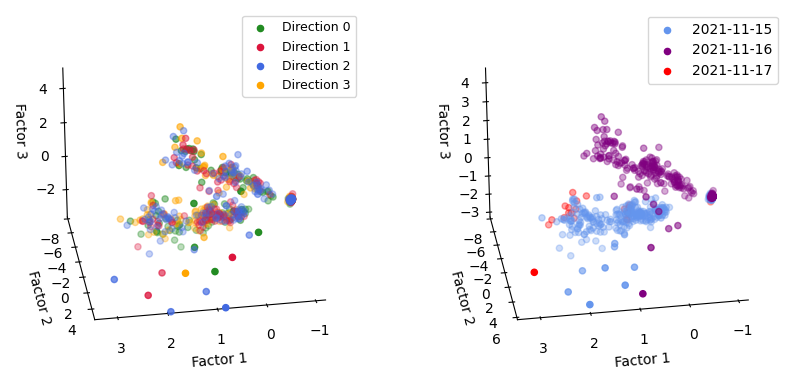

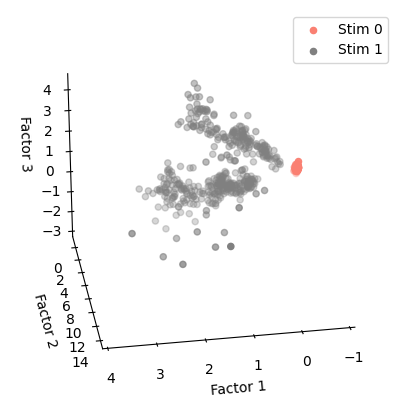

In [55]:
# # Perform FA on the data, using the top 8 factors, and visualize the factor loadings

num_factors = 30
fa = FactorAnalysis(n_components=num_factors)
fa.fit(data_scaled)
data_fa = fa.transform(data_scaled)
# Get the factor loadings
factor_loadings = fa.components_

plt.figure(figsize=(8, 4))
plt.imshow(factor_loadings, cmap="coolwarm", aspect="auto")
# set axis labels
plt.ylabel("Low dimensional factors")
# plt.title("Factor loadings")
num_channels = 12
offset = 5
# set x-axis labels, where every 12 columns is a new frequency band power: theta, alpha, beta, low gamma, Hgamma1, Hgamma2, Hgamma3
plt.xticks(np.arange(0+offset, data_to_use.shape[1]+offset, num_channels), 
           ["Theta", "Alpha", "Beta", "Low gamma", "Hgamma1", "Hgamma2", "Hgamma3"]
           +["Theta", "Alpha", "Beta", "Low gamma", "Hgamma1", "Hgamma2", "Hgamma3"]
           , rotation=45)

plt.xlabel("Contribution from each frequency band power at different ECoG electrodes")
plt.grid(False)
# make colorbar
plt.colorbar(label="Factor loading")

# Visualize the data projected onto the top three factors
fig = plt.figure(figsize=(10,5))

# Scatter plots for the first 3 factors, color the dots based on reaching angle
ax = fig.add_subplot(121, projection="3d")
num_directions = 4

# count the number of trials with specific reaching angle
# trial_break = [0, 125, 230, 350, 450]
trial_break = [0]
for reach_angle in [90, 180, 270, 360]:
    trial_num = data_select[data_select["angle"] == reach_angle].shape[0]
    trial_break.append(trial_break[-1] + trial_num)
    
# plot the first 100 trials in orange, from 125 to 225 in green, and from 230 to 330 in blue, and from 350 to 450 in purple
colors = ["forestgreen", "crimson","royalblue","orange"]
for i in range(num_directions):
    transformed_data_by_direction = data_fa[trial_break[i]:trial_break[i+1], :]
    ax.scatter(transformed_data_by_direction[:, 0], transformed_data_by_direction[:, 1], transformed_data_by_direction[:, 2], c=colors[i], label=f"Direction {i}")

ax.set_xlabel("Factor 1")
ax.set_ylabel("Factor 2")
ax.set_zlabel("Factor 3")
ax.legend(fontsize=9)
# # set axis limits
# ax.set_xlim(-1, 4)
ax.set_ylim(-8, 5)
ax.set_zlim(-3.5, 5)

# Make the grid lines invisible
set_grid_invisible(ax)
# Find the rotation angle that best separates the clusters
ax.view_init(azim=80, elev=25)

# Scatter plots for the first 3 factors, color the dots based on dates
ax = fig.add_subplot(122, projection="3d")
colors = ["cornflowerblue","purple","red"]
for k in range(3):
    transformed_data_by_date = data_fa[data_select["date"] == data_select["date"].unique()[k], :]
    ax.scatter(transformed_data_by_date[:, 0], transformed_data_by_date[:, 1], transformed_data_by_date[:, 2], c = colors[k],label=data_select["date"].unique()[k])
set_grid_invisible(ax)

ax.set_xlabel("Factor 1")
ax.set_ylabel("Factor 2")
ax.set_zlabel("Factor 3")
# add legend inside the plot axis
ax.legend(fontsize = 10)
ax.view_init(azim=80, elev=25)
ax.set_ylim(-8, 6)
# change axis label style so they're not overlapping
# ax.xaxis.labelpad = 10

# reset font size
plt.rcParams.update({'font.size': 10})

# Scatter plots for the first 3 factors, color the dots based on stim vs no stim condition
fig2 = plt.figure(figsize=(5,5))
ax = fig2.add_subplot(111, projection="3d")
colors = ["salmon","gray"]
for j in range(2):
    transformed_data_by_condition = data_fa[data_select["stim"] == j, :]
    ax.scatter(transformed_data_by_condition[:, 0], transformed_data_by_condition[:, 1], transformed_data_by_condition[:, 2], c = colors[j],label=f"Stim {j}")
set_grid_invisible(ax)
ax.set_xlabel("Factor 1")
ax.set_ylabel("Factor 2")
ax.set_zlabel("Factor 3")
ax.set_xlim(-1, 4)
ax.legend(fontsize = 10)
ax.view_init(azim=80, elev=25)



In [48]:
# Perform classification (Linear Discriminant Analysis) on the data projected onto the top 8 factors
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data_fa, data_select["angle"], test_size=0.33, random_state=42)

# Train a linear model to classify the data
model = LogisticRegression(max_iter=10000)
# model = LinearDiscriminantAnalysis()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# compare this to just using the raw data
X_train_raw, X_test_raw, y_train_raw, y_test_raw = train_test_split(data_scaled, data_select["angle"], test_size=0.33, random_state=42)

# Train a linear model to classify the raw data
model = LogisticRegression(max_iter=10000)
# model = LinearDiscriminantAnalysis()
model.fit(X_train_raw, y_train_raw)
y_pred_raw = model.predict(X_test_raw)
accuracy = accuracy_score(y_test_raw, y_pred_raw)
# print accuracy
print(f"Accuracy: {accuracy}")


Accuracy: 0.43859649122807015
Accuracy: 0.42105263157894735
